In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import torch

from datasets import MyDataset, get_mnist
from scipy.stats import gaussian_kde
from vae import VAE

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
train_data, _, test_data, _ = get_mnist()
train_data /= 255

In [26]:
device = torch.device('cuda')
data = MyDataset(train_data)
m = VAE(28 * 28, device=device)
m.fit(data, batch_size=100, epochs=40, loss_weight=.5)

In [27]:
train_mean, train_logvar = m.latent_representation(data[:].to(device))

/home/caleb/work/pi-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


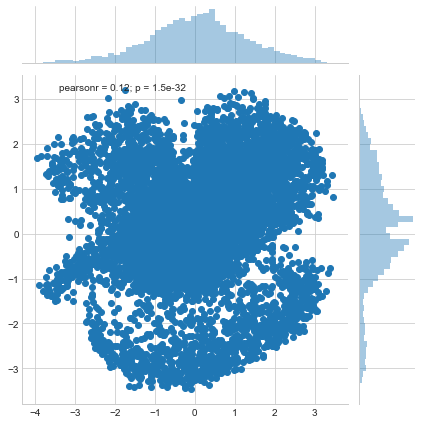

In [28]:
idx = random.sample(range(len(data)), 10000)
meancpu = train_mean.cpu().numpy()
sns.jointplot(x=meancpu[idx, 0], y=meancpu[idx, 1])

/home/caleb/work/pi-env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


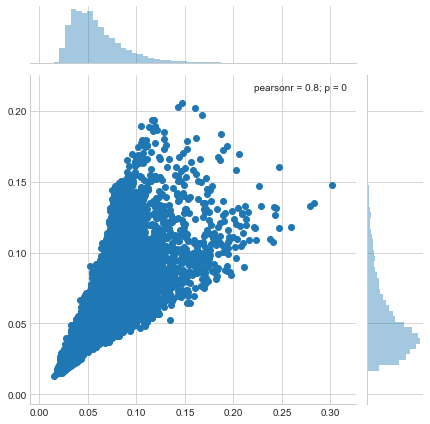

In [29]:
varcpu = np.exp(train_logvar.cpu().numpy())
sns.jointplot(x=varcpu[idx, 0], y=varcpu[idx, 1])

In [30]:
mean_kde = gaussian_kde(np.transpose(meancpu))
var_kde = gaussian_kde(np.transpose(varcpu))

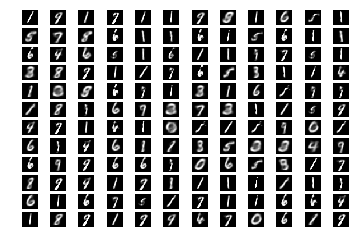

<Figure size 1440x1440 with 0 Axes>

In [35]:
n_samples = 144
sample_idx = random.sample(range(len(data)), n_samples)
mean_sample = torch.from_numpy(meancpu[sample_idx]).to(device)
var_sample = torch.from_numpy(varcpu[sample_idx]).to(device)
ims = m.generate(mean_sample, torch.log(var_sample)).cpu().detach().numpy().reshape(-1, 28, 28)
# mean_sample = torch.from_numpy(mean_kde.resample(n_samples)).float().to(device)
# var_sample = torch.from_numpy(var_kde.resample(n_samples)).float().to(device)
# ims = m.generate(torch.t(mean_sample), torch.log(torch.t(var_sample))).cpu().detach().numpy().reshape(-1, 28, 28)
with sns.axes_style('white'):
    for i, im in enumerate(ims, 1):
        ax = plt.subplot(12, 12, i)
        ax.set_axis_off()
        ax.imshow(im, cmap='gray')
    plt.figure(figsize=(20, 20))
    plt.show()